In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 128 kB 9.8 MB/s 
     |████████████████████████████████| 4.0 MB 48.9 MB/s 
     |████████████████████████████████| 112 kB 69.7 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 110 kB 62.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 4.8 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=a5b2492bc6fbdcea21d04055aea758332979834aef2671ea1d037d10ab8447b9
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data = pd.read_excel('META1.xlsx')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,ROE,Price/Book,Profit Margin,EPS
0,2015-12-23,105.889999,106.110001,103.860001,104.629997,104.629997,19599700,0.0728,0.061,0.1764,0.0333
1,2015-12-24,104.739998,105.320000,104.500000,105.019997,105.019997,6501800,0.0728,0.061,0.1764,0.0333
2,2015-12-28,105.019997,105.980003,104.529999,105.930000,105.930000,13069700,0.0728,0.061,0.1764,0.0333
3,2015-12-29,106.419998,107.739998,106.250000,107.260002,107.260002,17179900,0.0728,0.061,0.1764,0.0333
4,2015-12-30,107.000000,107.250000,106.059998,106.220001,106.220001,13115000,0.0728,0.061,0.1764,0.0333
5,2015-12-31,106.000000,106.169998,104.620003,104.660004,104.660004,18391100,0.0728,0.061,0.1764,0.0333
6,2016-01-04,101.949997,102.239998,99.750000,102.220001,102.220001,37912400,0.0728,0.061,0.1764,0.0333
7,2016-01-05,102.889999,103.709999,101.669998,102.730003,102.730003,23258200,0.0728,0.061,0.1764,0.0333
8,2016-01-06,101.129997,103.769997,100.900002,102.970001,102.970001,25096200,0.0728,0.061,0.1764,0.0333
9,2016-01-07,100.500000,101.430000,97.300003,97.919998,97.919998,45172900,0.0728,0.061,0.1764,0.0333


In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:15]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,index,Open,High,Low,Adj Close,ROE,Price/Book,Profit Margin,EPS,RSI,EMAF,EMAM,EMAS,Target,TargetClass
0,149,127.519997,128.330002,123.629997,125.000000,0.1409,0.0649,0.2912,2.12,70.257343,119.512150,114.151302,111.360600,-0.710000,0
1,150,124.650002,125.839996,123.709999,123.940002,0.1409,0.0649,0.2912,2.12,65.835561,119.933850,114.345138,111.527214,0.460000,1
2,151,123.849998,124.580002,122.860001,124.309998,0.1409,0.0649,0.2912,2.12,66.621215,120.350626,114.542462,111.696523,-0.970002,0
3,152,124.059998,124.800003,122.070000,123.089996,0.1409,0.0649,0.2912,2.12,61.615419,120.611519,114.711720,111.847430,-0.579994,0
4,153,123.089996,123.919998,122.309998,122.510002,0.1409,0.0649,0.2912,2.12,59.344170,120.792327,114.866141,111.988656,1.419999,1
5,154,122.940002,124.790001,122.510002,124.360001,0.1409,0.0649,0.2912,2.12,63.892798,121.132105,115.054138,112.152515,0.169999,1
6,155,124.980003,125.839996,124.620003,125.150002,0.1409,0.0649,0.2912,2.12,65.651086,121.514762,115.254056,112.324667,0.010002,1
7,156,125.250000,125.449997,124.550003,125.260002,0.1409,0.0649,0.2912,2.12,65.898825,121.871452,115.452194,112.495996,-0.279998,0
8,157,125.339996,126.089996,124.529999,125.059998,0.1409,0.0649,0.2912,2.12,64.985747,122.175123,115.642448,112.662406,-0.190003,0
9,158,125.070000,125.480003,124.540001,124.879997,0.1409,0.0649,0.2912,2.12,64.128938,122.432730,115.825369,112.824229,-0.299995,0


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00000000e+00 1.28395049e-01 1.28866521e-01 ... 0.00000000e+00
  4.79292920e-01 0.00000000e+00]
 [6.20347395e-04 1.18552816e-01 1.20393366e-01 ... 7.46893464e-04
  5.08838370e-01 1.00000000e+00]
 [1.24069479e-03 1.15809318e-01 1.16105776e-01 ... 1.50586256e-03
  4.72727214e-01 0.00000000e+00]
 ...
 [9.98759305e-01 9.17352566e-02 9.30343523e-02 ... 1.79508451e-01
  5.93939213e-01 1.00000000e+00]
 [9.99379653e-01 7.94924579e-02 9.14350022e-02 ... 1.77471035e-01
  5.74495050e-01 1.00000000e+00]
 [1.00000000e+00 9.12894233e-02 1.01677606e-01 ... 1.75619134e-01
  4.95202160e-01 0.00000000e+00]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

1613
[[[0.00000000e+00 1.28395049e-01 1.28866521e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  [6.20347395e-04 1.18552816e-01 1.20393366e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  [1.24069479e-03 1.15809318e-01 1.16105776e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  ...
  [1.67493797e-02 1.25480100e-01 1.34345134e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  [1.73697270e-02 1.37037010e-01 1.41286959e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  [1.79900744e-02 1.40054860e-01 1.38224401e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]]

 [[6.20347395e-04 1.18552816e-01 1.20393366e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  [1.24069479e-03 1.15809318e-01 1.16105776e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  [1.86104218e-03 1.16529482e-01 1.16854410e-01 ... 0.00000000e+00
   8.14968815e-01 2.72569444e-01]
  ...
  [1.73697270e-02 1.37037010e-01 1.41286959e-01 ... 0.00000000e+00
   8.

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1266
(1266, 30, 8)
(317, 30, 8)
(1266, 1)
(317, 1)
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
76/76 [==============================] - 6s 46ms/step - loss: 0.2741 - val_loss: 0.2962
Epoch 2/30
76/76 [==============================] - 3s 39ms/step - loss: 0.2558 - val_loss: 0.2611
Epoch 3/30
76/76 [==============================] - 3s 38ms/step - loss: 0.2556 - val_loss: 0.2960
Epoch 4/30
76/76 [==============================] - 3s 39ms/step - loss: 0.2551 - val_loss: 0.2510
Epoch 5/30
76/76 [==============================] - 3s 39ms/step - loss: 0.2544 - val_loss: 0.2520
Epoch 6/30
76/76 [==============================] - 3s 39ms/step - loss: 0.2541 - val_loss: 0.2490
Epoch 7/30
76/76 [==============================] - 3s 39ms/step - loss: 0.2538 - val_loss: 0.2520
Epoch 8/30
76/76 [==============================] - 3s 39ms/step - loss: 0.2514 - val_loss: 0.2535
Epoch 9/30
76/76 [==============================] - 3s 38ms/step - loss: 0.2538 - val_loss: 0.2491
Epoch 10/30
76/76 [==============================] - 3s 38ms/step - loss: 0.2519 - val_loss: 0.2495
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

10/10 [==============================] - 1s 21ms/step
[0.39700973] [0.]
[0.3966097] [1.]
[0.40703923] [1.]
[0.4066501] [1.]
[0.40450728] [0.]
[0.40190145] [0.]
[0.40779197] [0.]
[0.4100341] [1.]
[0.4114581] [0.]
[0.40981245] [1.]


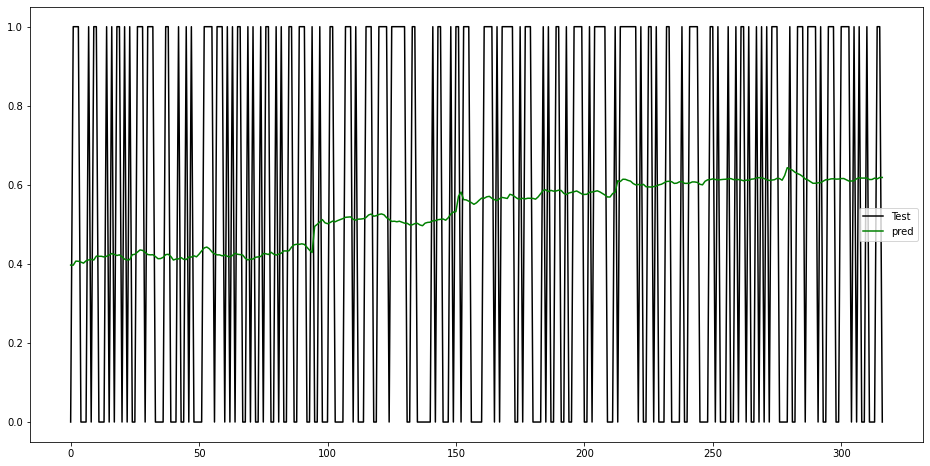

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()